In [77]:
import torch
import numpy as np
import random

In [14]:
a = np.array([True, False])
b = np.array([3,9])

In [15]:
a * b

array([3, 0])

In [38]:
def flip(x, ratio=0.5):
	'''binary mask flip by xor'''
	# flip by xor
	size = len(x)
	mask = np.zeros_like(x)
	mask[:(int)(ratio*size)] = 1
	np.random.shuffle(mask)
	return x ^ mask

In [65]:
flip(a)

array([ True,  True])

In [106]:
w = np.random.uniform(size=10)

In [107]:
w /= w.sum()

<StemContainer object of 3 artists>

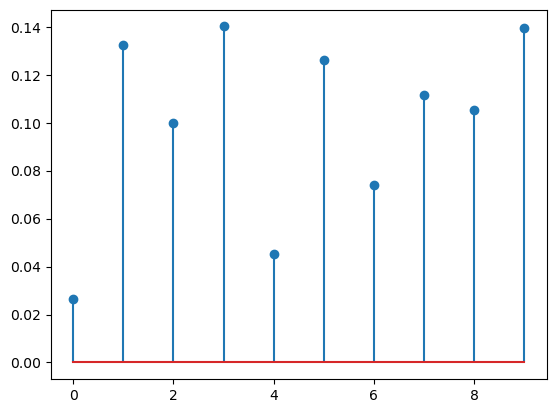

In [108]:
import matplotlib.pyplot as plt
plt.stem(range(10), w)

In [99]:
def resample(samples, weights):
	'''systematic resampling'''
	# weight normalization
	w = np.array(weights)
	w /= w.sum()
	w = w.cumsum()
	M = len(samples)
	ptrs = (random.random() + np.arange(M)) / M
	new_samples = []
	i = 0
	j = 0
	while i < M:
		if ptrs[i] < w[j]:
			new_samples.append(samples[j])
			i += 1
		else:
			j += 1
	return new_samples

In [122]:
resample(range(10), w)

[1, 2, 3, 3, 5, 6, 7, 8, 9, 9]

In [88]:
def resample_by_np_choice(samples, weights):
    N = len(samples)
    index = np.random.choice(range(0,N), size = N, replace = True, p = weights)
    return([samples[i] for i in index])

In [95]:
resample_by_np_choice(range(0,1000), None)

[35,
 549,
 657,
 816,
 909,
 226,
 311,
 8,
 510,
 584,
 277,
 113,
 3,
 416,
 858,
 353,
 235,
 37,
 436,
 922,
 663,
 556,
 983,
 30,
 190,
 722,
 233,
 730,
 56,
 267,
 887,
 84,
 990,
 465,
 990,
 12,
 847,
 768,
 421,
 60,
 586,
 713,
 517,
 699,
 653,
 254,
 573,
 950,
 645,
 508,
 823,
 286,
 650,
 964,
 942,
 351,
 775,
 366,
 948,
 154,
 361,
 100,
 485,
 554,
 274,
 506,
 585,
 711,
 305,
 296,
 575,
 332,
 248,
 788,
 664,
 205,
 886,
 825,
 757,
 694,
 93,
 817,
 416,
 317,
 904,
 757,
 847,
 304,
 493,
 747,
 780,
 798,
 604,
 972,
 26,
 316,
 664,
 741,
 983,
 731,
 96,
 28,
 547,
 827,
 403,
 946,
 204,
 310,
 108,
 646,
 794,
 544,
 476,
 920,
 497,
 912,
 464,
 418,
 611,
 309,
 391,
 627,
 705,
 983,
 212,
 641,
 522,
 288,
 373,
 174,
 103,
 66,
 434,
 0,
 76,
 178,
 518,
 57,
 852,
 778,
 561,
 432,
 925,
 171,
 455,
 455,
 735,
 719,
 262,
 477,
 294,
 152,
 665,
 152,
 726,
 981,
 746,
 45,
 29,
 224,
 344,
 598,
 675,
 169,
 458,
 887,
 319,
 64,
 768,
 452,
 0,

we use systematic resampling here.